In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None
df = pd.read_csv('data.csv')

In [3]:
df = df.fillna(0)

In [4]:
df.loc[df.type=='RE', 'amount'] = - df.loc[df.type=='RE']['amount']

In [5]:
df = df.drop('type', axis=1)

In [6]:
import datetime

In [7]:
def get_day(y, m, d):
    today = datetime.datetime(y, m, d)
    return today.weekday()

def parse_date(date):
    date = date.split()[0].split('/')
    return (date[0], date[1], date[2])

In [8]:
df.head(10)

,time,amount
0,2017/1/1 0:00,729.64
1,2017/1/1 0:05,1465.15
2,2017/1/1 0:10,1456.07
3,2017/1/1 0:15,1764.28
4,2017/1/1 0:20,1827.80
5,2017/1/1 0:25,689.82
6,2017/1/1 0:30,1088.74
7,2017/1/1 0:35,931.05
8,2017/1/1 0:40,807.87
9,2017/1/1 0:45,1595.64


In [9]:
starty, startm, startd = 2017, 1, 1
day_info = []
day_data = []
with open('data2.csv', 'w+') as f:
    for index, row in df.iterrows():
        y, m, d = map(int, parse_date(row['time']))
        if (y, m, d) == (starty, startm, startd):
            day_data.append(row['amount'])
        else:
            day_name = get_day(starty, startm, startd)
            day_info.append([startm, startd])
            day_info.append(day_name)
            day_info.append(np.round(np.sum(day_data)))
            day_info.append(day_data)
            f.write(str(day_info) + "\n")
            day_info = []
            day_data = []
            day_data.append(row['amount'])
            starty, startm, startd = y, m, d
        

In [10]:
starty, startm, startd = 2017, 1, 1
day_info = []
day_data = []
all_data = []
for index, row in df.iterrows():
    y, m, d = map(int, parse_date(row['time']))
    if (y, m, d) == (starty, startm, startd):
        day_data.append(row['amount'])
    else:
        day_name = get_day(starty, startm, startd)
        day_info.append(day_name)
        day_info.append(np.round(np.sum(day_data)))
        all_data.append(day_info)
        day_info = []
        day_data = []
        day_data.append(row['amount'])
        starty, startm, startd = y, m, d

In [11]:
idf = pd.DataFrame(all_data, columns=['weekday', 'sum'])

In [12]:
iy   = np.array([idf.loc[idf.weekday == i,'sum'].mean() for i in range(7)])
istd = np.array([idf.loc[idf.weekday == i,'sum'].std() for i in range(7)])
imax = np.array([idf.loc[idf.weekday == i,'sum'].max() for i in range(7)])
imin = np.array([idf.loc[idf.weekday == i,'sum'].min() for i in range(7)])
ix   = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

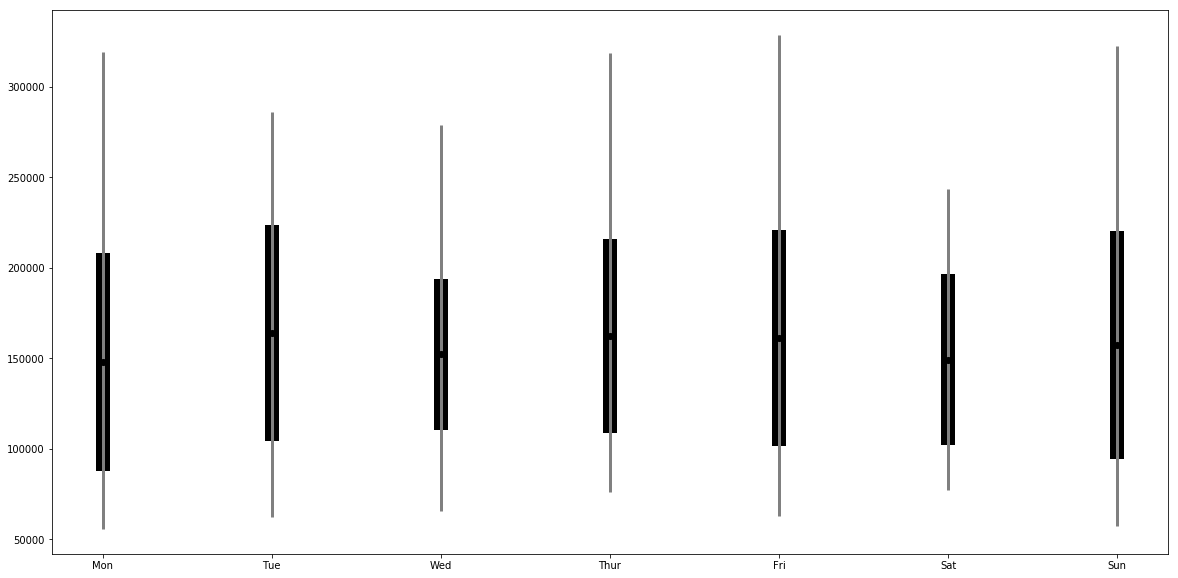

In [13]:
plt.figure(figsize=(20, 10))
plt.errorbar(ix, iy, istd, fmt='ok', lw=14)
plt.errorbar(ix, iy, [iy - imin, imax - iy],
             fmt='.k', ecolor='gray', lw=3)
plt.show()

In [14]:
idf.iloc[2:4]['sum'].mean()

149968.0

In [15]:
month_data = []
for offset in range(0, len(idf), 30):
    month_data.append(idf.iloc[offset: offset + 30]['sum'].mean())

In [16]:
month_data

[175882.8,
 154426.63333333333,
 130963.63333333333,
 152276.73333333334,
 121811.1,
 167510.66666666666,
 193420.9655172414]

In [17]:
starty, startm, startd = 2017, 1, 1
day_info = []
day_data = []
all_data = []
for index, row in df.iterrows():
    y, m, d = map(int, parse_date(row['time']))
    if (y, m, d) == (starty, startm, startd):
        day_data.append(row['amount'])
    else:
        day_name = get_day(starty, startm, startd)
        day_info.append(day_name)
        day_info.append(np.round(np.sum(day_data)))
        all_data.append(day_info)
        day_info = []
        day_data = []
        day_data.append(row['amount'])
        starty, startm, startd = y, m, d

In [18]:
from collections import defaultdict
def get_average_by_date(df):
    month_data = defaultdict(list)
    for index, row in df.iterrows():
        _, _, d = map(int, parse_date(row['time']))
        month_data[d].append(row['amount'])
    return month_data

In [19]:
md = get_average_by_date(df)

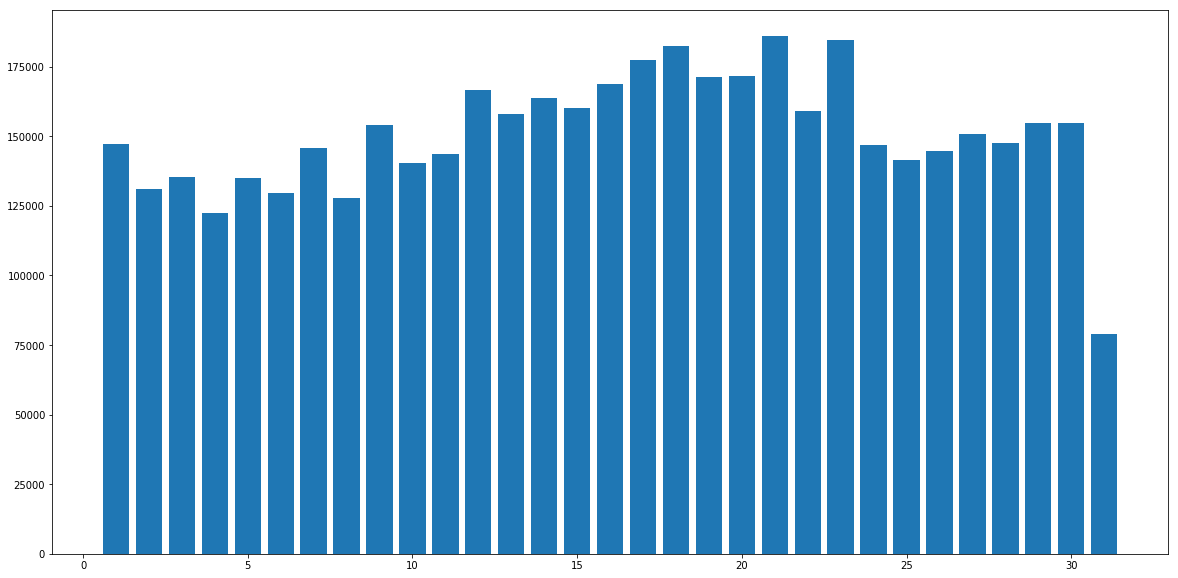

In [20]:
iy = [np.sum(md[i])/7 for i in range(1, 32)]
ix = [i for i in range(1, 32)]
plt.figure(figsize=(20, 10))
plt.bar(ix, iy)
plt.show()

In [94]:
data = pd.read_csv('pdata.csv', header=None)
target = pd.read_csv('target.csv', header=None)

In [95]:
data = data.drop(data.index[[i for i in range(7)]])

In [98]:
with open('features.csv', 'w+') as f:
    for index, row in data.iterrows():
        past_values = ",".join(map(str, [i[0] for i in target.iloc[index-7: index].values]))
        ori_data = ",".join(map(str,row.values))
        f.write(",".join([ori_data, past_values]) + "\n")
        

In [97]:
i = 0
for index, row in data.iterrows():
    print(index)
    i += 1
    if i > 5:
        break

7
8
9
10
11
12


In [96]:
data.iloc[0]

0        6
1        8
2    36255
Name: 7, dtype: int64

In [101]:
target[7:]

,0
7,93860
8,82925
9,101323
10,100402
11,147921
12,139605
13,182710
14,130012
15,319197
16,286269
